<a href="https://colab.research.google.com/github/KaiWoessner/NFLDataAnalysis/blob/main/NFLGameDrives.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# Install the library for NFL Data
!pip install nfl_data_py
import nfl_data_py as nfl

# Imports
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
from matplotlib import axes
from matplotlib.ticker import FuncFormatter
import numpy as np
from PIL import Image

#import os
import urllib.request
from matplotlib.offsetbox import OffsetImage, AnnotationBbox

from google.colab import drive

drive.mount('/content/drive', force_remount=False)

  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.7/1.7 MB 6.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 55.9/55.9 kB 6.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.6/1.6 MB 13.7 MB/s eta 0:00:00
  Created wheel for nfl_data_py: filename=nfl_data_py-0.3.1-py3-none-any.whl size=13187 sha256=4534dfdf9cf9cfd74a22486bbe51c555a86c28dd64d159f6965a02d3934b0ad9
  Stored in directory: /root/.cache/pip/wheels/ca/2e/d2/4def312ac7c070e1c0002e91ecc6923481a86c3ebd5b2c5413
Successfully built nfl_data_py
Mounted at /content/drive


In [ ]:
gm = nfl.import_pbp_data([2023])
pd.set_option('display.max_columns', None)
gm = gm[gm["game_id"] == "2023_03_LAC_MIN"]

gm.head(30)

In [96]:
lac_min = gm[["posteam","play_type", "drive", "qtr", "time", "yardline_100", "ydsnet", "drive_end_transition"]]

# lac_min = lac_min[(lac_min["play_type"] == "pass") | (lac_min["play_type"] == "run") | (lac_min["play_type"] == "no_play")]
lac_min = lac_min[lac_min['play_type'] != "kickoff"]
lac_min = lac_min[lac_min['play_type'] != "extra_point"]

lac_min = lac_min.sort_values(by = ["qtr","time"], ascending = [True, False]).reset_index(drop = True)

drive_start = lac_min.groupby('drive').first().reset_index()
drive_end = lac_min.groupby('drive').last().reset_index()


print(drive_start)
print(drive_end)

    drive posteam play_type  qtr   time  yardline_100  ydsnet  \
0     1.0     LAC       run  1.0  15:00          75.0     5.0   
1     2.0     MIN       run  1.0  12:43          57.0    40.0   
2     3.0     LAC      pass  1.0  08:32          79.0    79.0   
3     4.0     MIN      pass  1.0  02:51          75.0    22.0   
4     5.0     LAC       run  2.0  14:53          80.0    22.0   
5     6.0     MIN      pass  2.0  10:13          75.0    75.0   
6     7.0     LAC      pass  2.0  07:27          75.0    18.0   
7     8.0     MIN       run  2.0  06:02          45.0    40.0   
8     9.0     LAC      pass  2.0  02:08          75.0    75.0   
9    10.0     MIN      pass  2.0  00:47          75.0    24.0   
10   11.0     MIN       run  3.0  15:00          75.0    23.0   
11   12.0     LAC       run  3.0  13:40          94.0    59.0   
12   13.0     MIN       run  3.0  10:50          57.0    11.0   
13   14.0     LAC       run  3.0  07:04          80.0    80.0   
14   15.0     MIN      pa

HERE


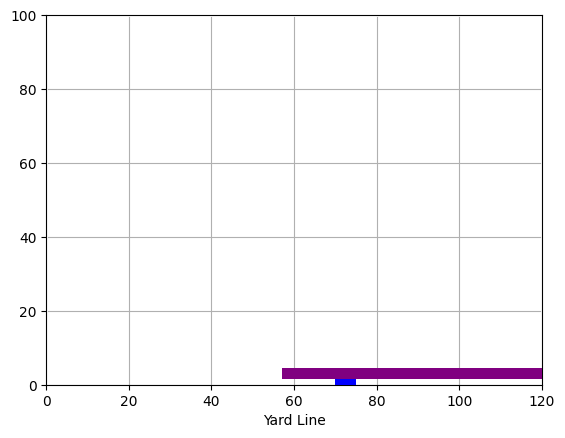

In [92]:
# Create a figure and axis
fig, ax = plt.subplots()

field_width = 100
field_length = 120

# Set the background color to green
# ax.set_facecolor('green')

# Plot the field
plt.plot([0, 0, field_length, field_length], [0, field_width, field_width, 0], color='white', lw=2)
plt.xlim(0, field_length)
plt.ylim(0, field_width)

# Plot the start and end positions as horizontal bars
# len(drive_start["drive"])
for i in range(2):
  if drive_start["qtr"][i] % 2 != 0:
    if (drive_start["posteam"][i] == "LAC"):
      print("HERE")
      plt.barh(3*i, drive_start["yardline_100"][i]  -  (drive_start["yardline_100"][i] + drive_start["ydsnet"][i]), left=drive_start["yardline_100"][i], height=3, color='blue', alpha=1, label="End", zorder = 10)
    if (drive_start["posteam"][i] == "MIN"):
      plt.barh(3*i, drive_start["yardline_100"][i] +  drive_start["ydsnet"][i], left=drive_start["yardline_100"][i], height=3, color='purple', alpha=1, label="End", zorder = 10)
  if drive_start["qtr"][i] % 2 == 0:
    if (drive_start["posteam"][i] == "LAC"):
      plt.barh(3*i, drive_start["yardline_100"][i] +  drive_start["ydsnet"][i], left=drive_start["yardline_100"][i], height=3, color='blue', alpha=1, label="End", zorder = 10)
    if (drive_start["posteam"][i] == "MIN"):
      plt.barh(3*i, drive_start["yardline_100"][i], left=drive_start["yardline_100"][i] -  drive_start["ydsnet"][i], height=3, color='purple', alpha=1, label="End", zorder = 10)

# Add labels and legend
plt.xlabel("Yard Line")
plt.grid(True)

# Display the field
plt.show()